In [1]:
import pandas as pd
import wikipedia as wp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
html = wp.page("Opinion polling for the Swedish general election, 2018").html().encode("UTF-8")
polls = pd.read_html(html)[0] # Selects the table at index "0".

In [3]:
# Create a header
polls.columns = polls.iloc[0]
polls = polls.reindex(polls.index.drop(0))

In [4]:
#### Clean up the date values ####
polls["date"] = polls.iloc[:,0].str.slice(-11,) # Limit ourselves to last poll date.
polls["date"] = polls["date"].str.replace("","0") # Changes "" to "0".


In [5]:
# Some values miss day info., I insert the middle of the month to compensate.
polls["date"] = polls["date"].where(polls.iloc[:,-1].str.len() != 8, "15 "+polls["date"])

In [6]:
# One value is of the format "6 June 2016"
polls["date"] = polls["date"].where(polls.iloc[:,-1] != "6 June 2016", "06 Jun 2016")


In [7]:
# Convert our date feature into date format
polls["date"] = pd.to_datetime(polls['date'], 
  format="%d %b %Y", utc=True)

In [8]:
#### Drop some columns ####
polls = polls.drop("Fieldwork date", "columns")
polls = polls.drop("Lead", "columns")
polls = polls.set_index("date")


In [9]:
#### The data is not stored as float numbers, let's correct this.
for party in list(polls)[1:-1]:
    polls[party] = pd.to_numeric(polls[party], errors = "coerce")

In [10]:
#### Eyeball some useful statistics:
polls.describe().round(2)

,S,M,SD,MP,C,V,L,KD,Fi
count,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,359.00
mean,26.35,21.41,18.82,5.08,8.47,7.64,5.17,3.75,2.07
std,2.58,3.23,3.53,1.31,2.14,1.35,0.81,0.97,0.56
min,20.80,12.70,11.80,2.10,4.70,4.10,3.30,1.90,0.50
25%,24.60,18.40,16.50,4.10,6.70,6.80,4.60,3.00,1.70
50%,26.20,22.00,18.20,4.90,8.10,7.50,5.10,3.60,2.00
75%,28.00,24.00,20.80,6.00,9.60,8.20,5.80,4.10,2.50
max,34.30,28.10,28.80,10.00,14.20,12.60,7.40,7.00,3.40


In [11]:
#### Create a smooth average value ####
MA_30 = polls.iloc[:,1:].rolling(30)

In [12]:
#### Set colour scheme
colours = ["crimson", "mediumblue", "gold", "chartreuse", "g", 
           "darkred", "lightskyblue", "midnightblue", "fuchsia"]


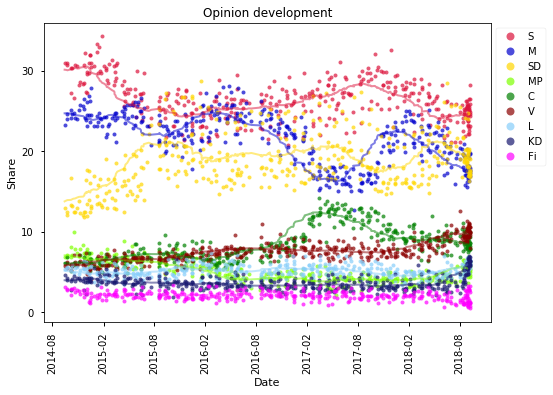

In [13]:
#### Build a plot ####
n_parties = len(list(polls)[1:-1]) + 1
with plt.style.context("seaborn-notebook"):
    #fig = plt.figure()
    fig, ax = plt.subplots()
    for party in np.arange(1,n_parties,1): #list(polls)[1:-1]:
        ax.plot(polls.iloc[:,party], linestyle = "none", 
                marker = "o", markersize = 4, alpha = 0.7,
                color = colours[party-1])
        plt.xlabel("Date")
    plt.ylabel("Share")
    plt.title("Opinion development")
    plt.xticks(rotation = 90)
    ax.legend(list(polls)[1:-1],bbox_to_anchor=(1, 1), markerscale = 2)
    plt.locator_params(axis='y', nbins=6)
    
    for party in np.arange(0,n_parties-1,1): #list(polls)[1:-1]:
        ax.plot(MA_30.mean().iloc[:,party],
                color = colours[party], alpha = 0.5, linewidth = 2)

In [14]:
plt.show()

The social democrats (S) are the biggest party, followed by the moderates (M) and the swedish democrats (SD)

# Constellations
How do the different, classical, blocs compare over time?


In [15]:
polls["Alliance"] = polls["M"] + polls["KD"] + polls["C"] + polls["L"]
polls["Red_Green"] = polls["S"] + polls["MP"] + polls["V"]

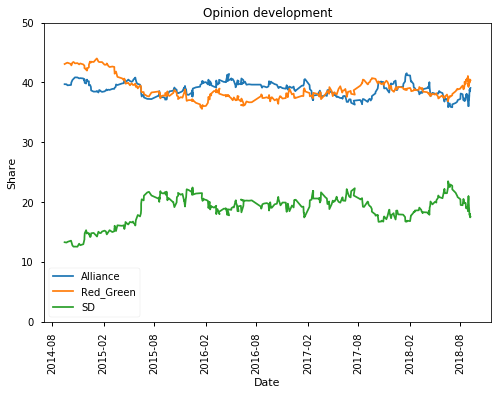

In [16]:
with plt.style.context('seaborn-notebook'):
    #fig = plt.figure()
    fig, ax = plt.subplots()
    ax.plot(polls["Alliance"].rolling(7).mean())
    ax.plot(polls["Red_Green"].rolling(7).mean())
    ax.plot(polls["SD"].rolling(7).mean())
    
    plt.xlabel("Date")
    plt.ylabel("Share")
    plt.title("Opinion development")
    plt.xticks(rotation = 90)
    ax.set(ylim = (0, 50))
    ax.legend()


In [17]:
plt.show()